In [28]:
import numpy as np
from sklearn.datasets import load_breast_cancer

### Loading the datset

In [29]:
breast_cancer_data = load_breast_cancer()

### Exploring the dataset

In [30]:
breast_cancer_data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [31]:
print(breast_cancer_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [9]:
X = breast_cancer_data.data
y = breast_cancer_data.target

X.shape

(569, 30)

In [32]:
y.shape

(569,)

### Standardize data

In [38]:
from sklearn.preprocessing import StandardScaler

SC = StandardScaler()

X_t = SC.fit_transform(X)


### Performing PCA

In [39]:
from sklearn.decomposition import PCA  

In [40]:
pca = PCA(n_components=5)

In [41]:
X_trans = pca.fit_transform(X_t)

In [42]:
X_trans.shape

(569, 5)

### Using the first two primcipal components for data visualization

In [43]:
x1 = X_trans[y==0][:,0]
y1 = X_trans[y==0][:,1]


x2 = X_trans[y==1][:,0]
y2= X_trans[y==1][:,1]

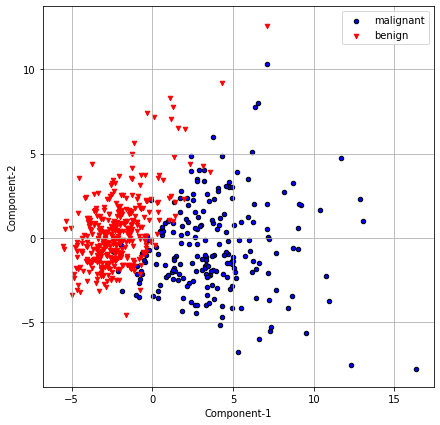

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(7,7))
plt.scatter(x1, y1, c='b', label='malignant', marker='o', s=20, edgecolors='k')
plt.scatter(x2, y2, c='r', label='benign', marker='v', s=20)
plt.xlabel('Component-1')
plt.ylabel('Component-2')
plt.grid()
plt.legend(loc='best')
plt.show()

### Scree plot

Text(0, 0.5, 'Explained Variance')

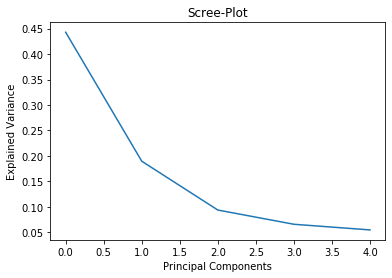

In [45]:
plt.plot(pca.explained_variance_ratio_)
plt.title("Scree-Plot")
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')

In [46]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768])

In [47]:
np.cumsum(pca.explained_variance_ratio_)

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274])

### Visualizing the tree